In [1]:
# 套件載入
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

In [3]:
from sklearn import preprocessing
from sklearn import metrics

In [4]:
#載入資料集
train = pd.read_csv('./dataset/ghouls-goblins-and-ghosts-boo/train.csv')
test = pd.read_csv('./dataset/ghouls-goblins-and-ghosts-boo/test.csv')

In [5]:
# train

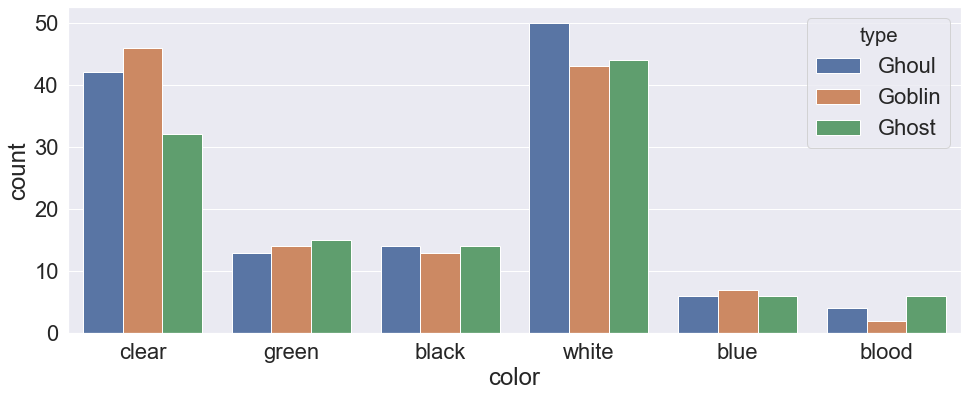

In [6]:
sns.set(font_scale=2)
plt.figure(figsize=(16, 6))
sns.countplot(x="color",hue='type', data=train)

In [7]:
color_count = data['color'].value_counts()

NameError: name 'data' is not defined

In [ ]:
color_count

In [ ]:
#合併
data = train.append(test,sort=False)
data.reset_index(inplace=True,drop=True)

color_count = data['color'].value_counts()
# print(color_count)

sns.set(font_scale=2)
plt.figure(figsize=(14, 6))
sns_plot = sns.countplot(x="color", data=data,order = color_count.index)

for i, v in color_count.reset_index().iterrows():
    sns_plot.text(i, v.color + 1.2 , v.color, horizontalalignment='center')

In [ ]:
# Grouped boxplot
sns.set(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
col_names = ['rotting_flesh','bone_length','hair_length','has_soul']
for i in range(len(col_names)):
    sns.boxplot(x="type", y=col_names[i], data=train, palette="Set1",ax=axes[i])

In [ ]:
color = ['red','yellow','green','blue']
col = ['rotting_flesh','bone_length','hair_length','has_soul']
for i in range(4):
    plt.subplot(1,4,i+1)
    train.groupby('type').mean()[col[i]].plot(kind='bar',figsize=(16,5), color=color[i])
#     plt.set_title('Scores by group and gender')
plt.suptitle('type vs all features',fontsize=20,color='white')

###### train

In [ ]:
# plt.figure(figsize=(10, 6))
# heatmap = sns.heatmap(dum_data.corr(), vmin=-1, vmax=1, annot=True)
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
# heatmap.spines['left'].set_color('white')
# ax.spines['left'].set_color('orange')

In [ ]:
# Use LabelEncoder for the 'color' feature
# color_le = preprocessing.LabelEncoder()
# color_le.fit(train['color'])
# train['color_int'] = color_le.transform(train['color'])

# _ = sns.pairplot(train.drop('color', axis = 1), hue = 'type', palette = 'muted', diag_kind='kde')

# train.drop('color_int', axis = 1, inplace = True)

In [ ]:
#檢視資料集
# train.head(10)

In [ ]:
#查看資料型態
# train.describe()

In [ ]:
# test.describe()

In [ ]:
#train test資料的id
index_train = train['id']
index_test = test['id']

#y_train中type欄位為模型的答案
y_train = train['type']

#將train資料中不要進行訓練的欄位刪除
train = train.drop(['id','type'],axis=1)
test = test.drop(['id'],axis=1)

#處理資料中非數值欄位 -> get_dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
#處理資料中非數值欄位 -> get_dummies
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
X = train[train.columns].values
y = y_train

In [ ]:
X

In [ ]:
#區分訓練資料、測試資料
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.3,
                                                random_state = 1,
                                                stratify = y)
# X_train,X_test,Y_train,Y_validation=train_test_split(train,y_train,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=30,
                              random_state=1)
tree = tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' 
      % (tree_train, tree_test))

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble, preprocessing, metrics

In [ ]:
# 建立 random forest 模型
forest = ensemble.RandomForestClassifier(bootstrap=True, max_depth=100,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
forest_fit = forest.fit(X_train, y_train)

# 預測
y_test_pred = forest.predict(X_test)

# 績效
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
color_le = preprocessing.LabelEncoder()
color_le.fit(y_train)
y_train = color_le.transform(y_train)

In [ ]:
color_le = preprocessing.LabelEncoder()
color_le.fit(y_test)
y_test = color_le.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state = 42)
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3,5],
    'min_samples_split': [8,12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
#     return accuracy

In [ ]:
best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X_test, y_test)
print('best_grid:',best_grid)
# print('grid_acc:',grid_accuracy)

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_train = accuracy_score(y_train, y_train_pred)
lr_test = accuracy_score(y_test, y_test_pred)
print('LogisticRegression train/test accuracies %.3f/%.3f' 
      % (lr_train, lr_test))
importance = lr.coef_[0]
cols = train.columns
for i,k in zip(cols,importance):
	print(i,k)

In [ ]:
train

In [ ]:
# #train test資料的id
# index_train = train['id']
# index_test = test['id']

# #y_train中type欄位為模型的答案
# y_train = train['type']

#將train資料中不要進行訓練的欄位刪除
train_nocolor = train.drop(['color'],axis=1)
test_nocolor = test.drop(['color'],axis=1)

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

std_lr_train = accuracy_score(y_train, y_train_pred)
std_lr_test = accuracy_score(y_test, y_test_pred)
print('std >> LogisticRegression train/test accuracies %.3f/%.3f' 
      % (std_lr_train, std_lr_test))
importance = lr.coef_[0]
cols = train.columns
for i,k in zip(cols,importance):
	print(i,k)

In [ ]:
X_train

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train_std,y_train)

y_train_pred = xgbc.predict(X_train_std)
y_test_pred = xgbc.predict(X_test_std)

xgbc_train = accuracy_score(y_train, y_train_pred)
xgbc_test = accuracy_score(y_test, y_test_pred)

print('XGBClassifier train/test accuracies %.3f/%.3f' 
      % (xgbc_train, xgbc_test))

In [ ]:
#Logistic Regression
# lr = LogisticRegression()
# lr.fit(X_train_std,y_train)
# y_test_pred = lr.predict(X_test_std)
# print(accuracy_score(y_test_pred,y_test))

In [ ]:
# y_test
# X_train

In [ ]:
#Logistic Regression train on entire training test
train_std = sc.fit_transform(train)
test_std = sc.transform(test)

lr.fit(train_std,y_train)
y_pred = lr.predict(test_std)

In [ ]:
submit1=pd.DataFrame()
submit1['id']=index_test
submit1['type']=y_pred
submit1
submit1.to_csv("sub.csv",sep=',',header=True,index=None)

In [ ]:
train

In [ ]:
def pp(b,c,a='0'):
    print(a)
    print(b)
    print(c)

In [ ]:
pp(11,3,a=4)